# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [9]:
dim = 2
N = 4000
dtilde = 3
mp_deg = 4
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.H2SampletTree(pts, dtilde, mp_deg)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
spts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.7505736351013184 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         4000
cluster splitting method: CardinalityBisection
bounding box diameter:    1.02e+01
number of clusters:       511
fill distance:            7.19e-01
separation radius:        1.90e-04
min cluster discrepancy:  8.85e-05
max cluster discrepancy:  9.13e-02
mean cluster discrepancy: 9.27e-03
pt. mindist distribution: 
 9.13e-06|****************************************
 2.74e-05|********
 4.56e-05|**
 6.39e-05|*
 8.21e-05|*
 1.00e-04|*
 1.19e-04|*
 1.37e-04|*
 1.55e-04|*
 1.73e-04|*
 1.92e-04|
 2.10e-04|
 2.28e-04|*
 2.46e-04|*
 2.65e-04|*
discrepancy distribution: 
 1.12e-04|*
 1.77e-04|
 2.81e-04|*
 4.47e-04|*
 7.10e-04|*
 1.13e-03|***
 1.79e-03|******
 2.84e-03|****************************************
 4.52e-03|**************
 7.17e-03|***********************
 1.14e-02|*************
 1.81e-02|**
 2.87e-02|**

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [10]:
start = time.time()
data = 2 * np.array(np.random.rand(N,1000), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  3.402020215988159 sec.
relative error:  5.666626791668116e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

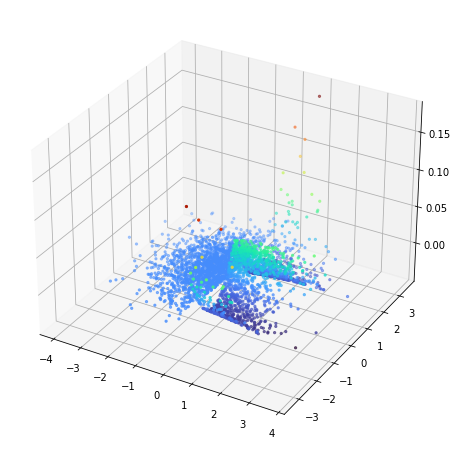

In [11]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(spts[0,:], spts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

In [12]:
cov = FMCA.CovarianceKernel("exponential", 2)
K = FMCA.sampletCompressKernel(cov, ST, pts, 0.8, 1e-2)

3 4  8.00e-01 1.00e-02


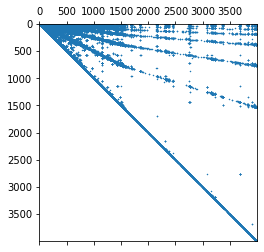

In [14]:
plt.spy(K,markersize=0.5)
plt.show()